In [1]:
import numpy as np
import math
from scipy.optimize import fsolve
import matplotlib.pyplot as plt 

In [2]:
Rs_STC= 0.21721509749730586
Rsh_STC= 1104.8948729303456
Iph_STC= 8.841737886118327
Isat_STC= 2.1922584839244864e-07
eta= 1.3974467720580908
Vt_STC= 0.02571543749999999
Ncell=72
Voc_STC= 45.300000000011885
Isc_STC= 8.839999758809823
Pmax_STC= 300.1199710523156
FF_STC= 0.7494530661370086
alpha=0.0006

In [3]:
Kb = 1.38 * (10**-23)
q = 1.6 * (10**-19)

In [4]:
G_STC=1000
T_STC=298
G=1000
Temp=np.arange(253,363,10)
Ksc=np.log((6.56-alpha*(293-298)))/(np.log(800/100))
Eg=0.6
print(Ksc)

0.9047851443670281


In [5]:
Voc_T=[]
Isc_T=[]
Iph_T=[]
Isat_T=[]
Vt_T=[]
for T in Temp:
    Vt = (Kb * T) / q
    Isc_GT=((G/G_STC)**Ksc) * (Isc_STC +alpha*(T-T_STC ))
    Rs_GT=Rs_STC
    Rsh_GT=(G_STC/G)*Rsh_STC
    Iph_GT= Isc_GT*(1+(Rs_GT/(Rsh_GT)))
    Isat_GT=Isat_STC*((T/T_STC ))**3 * np.exp(((q*Eg)/(eta*Kb ))*(1/T_STC-1/T))
    def V_oc(x):
        Voc=x[0]
        F=np.zeros(np.size(x))
        F[0]= Iph_GT-Isat_GT*(np.exp(Voc/(eta*Ncell*Vt)))-Voc/Rsh_GT 
        return F

    x=fsolve(V_oc,72.06)
    Voc_T.extend(x)
    Isc_T.append(Isc_GT)
    Iph_T.append(Iph_GT)
    Isat_T.append(Isat_GT)
    Vt_T.append(Vt)
print("Voc_T=",Voc_T)
print("Isc_T=",Isc_T)
print(Vt_T)

Voc_T= [46.03489388048286, 45.88311843432774, 45.72156420597185, 45.55059408961932, 45.37054531294246, 45.181732066992794, 44.98444778863164, 44.778967150993715, 44.56554780727315, 44.344431924885065, 44.115847540586415]
Isc_T= [8.812999758809823, 8.818999758809822, 8.824999758809822, 8.830999758809822, 8.836999758809823, 8.842999758809823, 8.848999758809823, 8.854999758809823, 8.860999758809823, 8.866999758809822, 8.872999758809822]
[0.021821249999999993, 0.022683749999999996, 0.023546249999999994, 0.024408749999999996, 0.025271249999999995, 0.02613374999999999, 0.026996249999999996, 0.02785874999999999, 0.02872124999999999, 0.029583749999999992, 0.03044624999999999]


In [6]:
k0=[]
k1=[]
k2=[]
k3=[]
k4=[]
k5=[]
k6=[]
k7=[]
k8=[]
k9=[]
k10=[]
a0=[]
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
a7=[]
a8=[]
a9=[]
a10=[]
i=[k0,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10]#current arrays
v=[a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]#voltage arrays
j=0
for j in range(11):
    def I_sc(x):
        I=x[0]
        F=np.zeros(np.size(x))
        F[0]= -I + Iph_T[j] - Isat_T[j]*(np.exp((V+I*Rs_GT) / (eta*Ncell*Vt_T[j]))-1) - (V+I*Rs_GT)/Rsh_GT
        return F
    Vx=np.linspace(0,Voc_T[j],num=256)
    for V in Vx:
        x = fsolve(I_sc,Iph_T[j])
        i[j].extend(x)
    v[j].extend(Vx)

C:\Users\Makrand\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


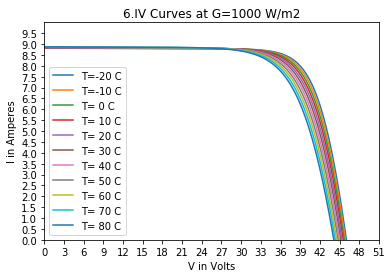

In [7]:
plt.plot(a0, k0,label='T=-20 C')
plt.plot(a1, k1,label='T=-10 C')
plt.plot(a2, k2,label='T= 0 C')
plt.plot(a3, k3,label='T= 10 C')
plt.plot(a4, k4,label='T= 20 C')
plt.plot(a5, k5,label='T= 30 C')
plt.plot(a6, k6,label='T= 40 C')
plt.plot(a7, k7,label='T= 50 C')
plt.plot(a8, k8,label='T= 60 C')
plt.plot(a9, k9,label='T= 70 C')
plt.plot(a10, k10,label='T= 80 C')
plt.axis([0, 50, 0, 10])
plt.legend()
plt.margins(2,2)
plt.xticks(np.arange(0, 52, 3)) 
plt.yticks(np.arange(0, 10, 0.5)) 
plt.title('6.IV Curves at G=1000 W/m2')
plt.xlabel('V in Volts')
plt.ylabel('I in Amperes')
plt.show()

In [8]:
p=[]
b=0
Pmax_T=[]
for b in range(11):
    p=np.multiply(v[b],i[b])
    Pmax_T.append(np.amax(p))
print("Pmax_T=",Pmax_T)

Pmax_T= [314.148568624083, 311.06928962435654, 307.9444932481874, 304.7764918413985, 301.5674609112169, 298.3260377385902, 295.05010823421316, 291.7389896279614, 288.3944103864649, 285.01804079273876, 281.61149919484217]


In [9]:
FF_T=[]
for b in range (11):
    FF_T.append(Pmax_T[b]/(Voc_T[b]*Isc_T[b]))

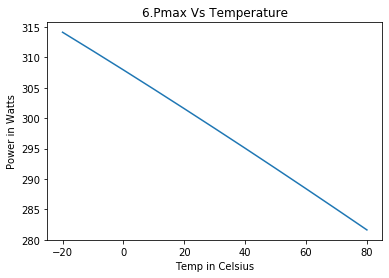

In [10]:
TempC=np.arange(-20,90,10)
plt.plot(TempC, Pmax_T)
#plt.axis([-20, 100, 280, 320])
plt.title('6.Pmax Vs Temperature')
plt.xlabel('Temp in Celsius')
plt.ylabel('Power in Watts')
plt.show()

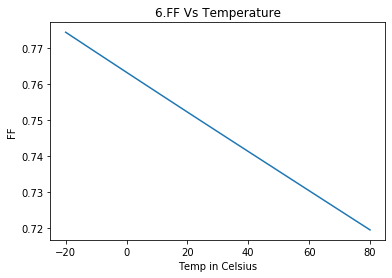

In [11]:
plt.plot(TempC, FF_T)
#plt.axis([0, 100, 0, 0.8])
plt.title('6.FF Vs Temperature')
plt.xlabel('Temp in Celsius')
plt.ylabel('FF')
plt.show()

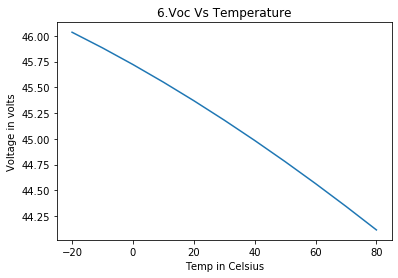

In [12]:
plt.plot(TempC, Voc_T)
#plt.axis([0, 100, 0, 48])
plt.title('6.Voc Vs Temperature')
plt.xlabel('Temp in Celsius')
plt.ylabel('Voltage in volts')
plt.show()

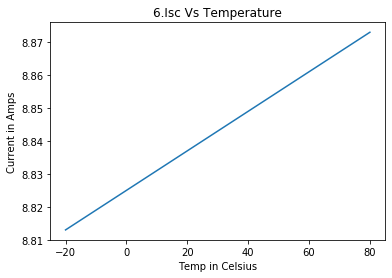

In [13]:
plt.plot(TempC, Isc_T)
#plt.axis([0, 100, 0, 10])
plt.title('6.Isc Vs Temperature')
plt.xlabel('Temp in Celsius')
plt.ylabel('Current in Amps')
plt.show()

# Q7

In [14]:
Temp=np.linspace(298,333,num=20)
Irr=np.linspace(700,1200,num=20)
print(Temp)

[298.         299.84210526 301.68421053 303.52631579 305.36842105
 307.21052632 309.05263158 310.89473684 312.73684211 314.57894737
 316.42105263 318.26315789 320.10526316 321.94736842 323.78947368
 325.63157895 327.47368421 329.31578947 331.15789474 333.        ]


In [15]:
rows=20
VocGT= [[0 for i in range(0)] for j in range(rows)] 
IscGT= [[0 for i in range(0)] for j in range(rows)] 
IphGT= [[0 for i in range(0)] for j in range(rows)] 
IsatGT=[[0 for i in range(0)] for j in range(rows)] 
VtGT=  [[0 for i in range(0)] for j in range(rows)] 
RshGT= [[0 for i in range(0)] for j in range(rows)] 
Ksc= 0.997951


In [16]:
c=0;
for G in Irr:
    for T in Temp:
        Vt = (Kb * T) / q
        Isc_GT=((G/G_STC)**Ksc) * (Isc_STC +alpha*(T-T_STC ))
        Rs_GT=Rs_STC
        Rsh_GT=(G_STC/G)*Rsh_STC
        Iph_GT= Isc_GT*(1+(Rs_GT/(Rsh_GT)))
        Isat_GT=Isat_STC*((T/T_STC ))**3 * np.exp(((q*Eg)/(eta*Kb ))*(1/T_STC-1/T))
        def V_oc(x):
            Voc=x[0]
            F=np.zeros(np.size(x))
            F[0]= Iph_GT-Isat_GT*(np.exp(Voc/(eta*Ncell*Vt)))-Voc/Rsh_GT 
            return F

        x=fsolve(V_oc,72.06)
        VocGT[c].extend(x)
        IscGT[c].append(Isc_GT)
        IphGT[c].append(Iph_GT)
        IsatGT[c].append(Isat_GT)
        VtGT[c].append(Vt)
        RshGT[c].append(Rsh_GT)
    c+=1
    


In [17]:
print(IphGT[9])

[8.284316635926087, 8.2853524221496, 8.286388208373111, 8.287423994596622, 8.288459780820135, 8.289495567043648, 8.29053135326716, 8.291567139490672, 8.292602925714183, 8.293638711937694, 8.294674498161205, 8.295710284384718, 8.296746070608231, 8.297781856831744, 8.298817643055253, 8.299853429278766, 8.300889215502277, 8.30192500172579, 8.302960787949301, 8.303996574172814]


In [18]:
j=0
k=0
m=0
rows=400
v1 = [[0 for i in range(0)] for j in range(rows)] 
i1 = [[0 for i in range(0)] for j in range(rows)] 

for j in range(20):
    for k in range(20):
        def I_sc(x):
            I=x[0]
            F=np.zeros(np.size(x))
            F[0]= -I + IphGT[j][k] - IsatGT[j][k]*(np.exp((V+I*Rs_GT) / (eta*Ncell*VtGT[j][k]))-1) - (V+I*Rs_GT)/RshGT[j][k]
            return F
        Vx=np.linspace(0,VocGT[j][k],num=256)
        for V in Vx:
            x = fsolve(I_sc,Iph_STC)
            i1[m].extend(x)
        v1[m].extend(Vx)
        m+=1

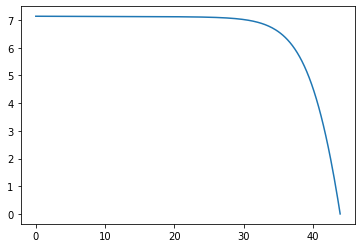

In [19]:
plt.plot(v1[99],i1[99])
plt.show()

In [20]:
m=0
p1=[]
PmaxGT=[]
for m in range(400):
    p1=np.multiply(v1[m],i1[m])
    PmaxGT.append(np.amax(p1))
#print("PmaxGT=",PmaxGT)

In [26]:
PmaxGT1=np.array(PmaxGT).reshape(20,20)
print(PmaxGT1)

[[207.91206247 207.45920667 207.00332404 206.54525352 206.09571204
  205.64320544 205.18777505 204.72946203 204.2683073  203.80799618
  203.35292824 202.89507334 202.43447028 201.97115764 201.50517381
  201.04226983 200.58213176 200.11937128 199.65402486 199.18612879]
 [215.99869096 215.53014556 215.05875895 214.59683251 214.1318082
  213.66372923 213.19263858 212.71857899 212.24467239 211.77696441
  211.30634476 210.83285392 210.35653216 209.87741955 209.40062664
  208.92761245 208.45185838 207.97340247 207.49228257 207.00853632]
 [224.08236394 223.59808546 223.12387846 222.64652025 222.16597506
  221.68228775 221.1955029  220.70832993 220.22816474 219.74496181
  219.25876337 218.76961141 218.2775477  217.78718067 217.30147095
  216.81290267 216.32151548 215.82734882 215.33044189 214.83659104]
 [232.16206883 231.67566047 231.18614753 230.69331382 230.19720612
  229.69787093 229.19776707 228.70532284 228.20971347 227.71098295
  227.20917505 226.70433326 226.20071307 225.7024838  225.20

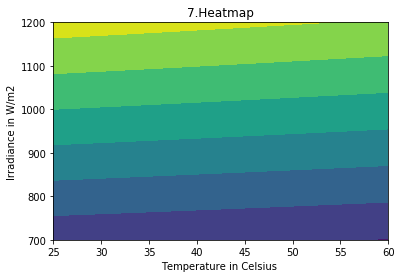

In [29]:
TempC=np.linspace(25,60,num=20)
X, Y = np.meshgrid(TempC,Irr)
Z=PmaxGT1
plt.contourf(X, Y, Z)
plt.title('7.Heatmap')
plt.xlabel('Temperature in Celsius ')
plt.ylabel('Irradiance in W/m2')
plt.show()

In [23]:
print("PmaxGT_max=",np.amax(PmaxGT))
print("PmaxGT_min=",np.amin(PmaxGT))

PmaxGT_max= 360.9408264845642
PmaxGT_min= 199.18612878970887


In [24]:
index=np.where(PmaxGT==np.amax(PmaxGT))
print(index)

(array([380], dtype=int64),)


In [25]:
index=np.where(PmaxGT1==np.amax(PmaxGT1))
print(index)

(array([19], dtype=int64), array([0], dtype=int64))
